In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter Notebook Configuration
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the data
data = pd.read_csv('../data/ecommerce_data.csv')

data.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [3]:
data.shape

(536350, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


In [5]:
# Transform date into datetime format
data['Date'] = pd.to_datetime(data['Date'])

In [6]:
# Create a feature with the value spent in each purchase (assuming each row represents a different purchase)
data['PurchaseValue'] = data['Price'] * data['Quantity']

In [7]:
# Let's get a better understand of the data
data.describe()

,Date,Price,Quantity,CustomerNo,PurchaseValue
count,536350,536350.000000,536350.000000,536295.000000,5.363500e+05
mean,2019-07-04 02:52:31.891116032,12.662182,9.919347,15227.893178,1.123893e+02
min,2018-12-01 00:00:00,5.130000,-80995.000000,12004.000000,-8.401138e+05
25%,2019-03-28 00:00:00,10.990000,1.000000,13807.000000,1.618000e+01
50%,2019-07-20 00:00:00,11.940000,3.000000,15152.000000,4.272000e+01
75%,2019-10-19 00:00:00,14.090000,10.000000,16729.000000,1.160000e+02
max,2019-12-09 00:00:00,660.620000,80995.000000,18287.000000,1.002718e+06
std,NaN,8.490450,216.662300,1716.582932,2.277384e+03


In [8]:
# Insights we have here:
# - The average customer has ~10 items per purchase
# - The average customer spends $112 per purchase
# - The data covers one year from Dec 2018 to Dec 2019

In [9]:
# Number of diferent customers
data['CustomerNo'].nunique()

4738

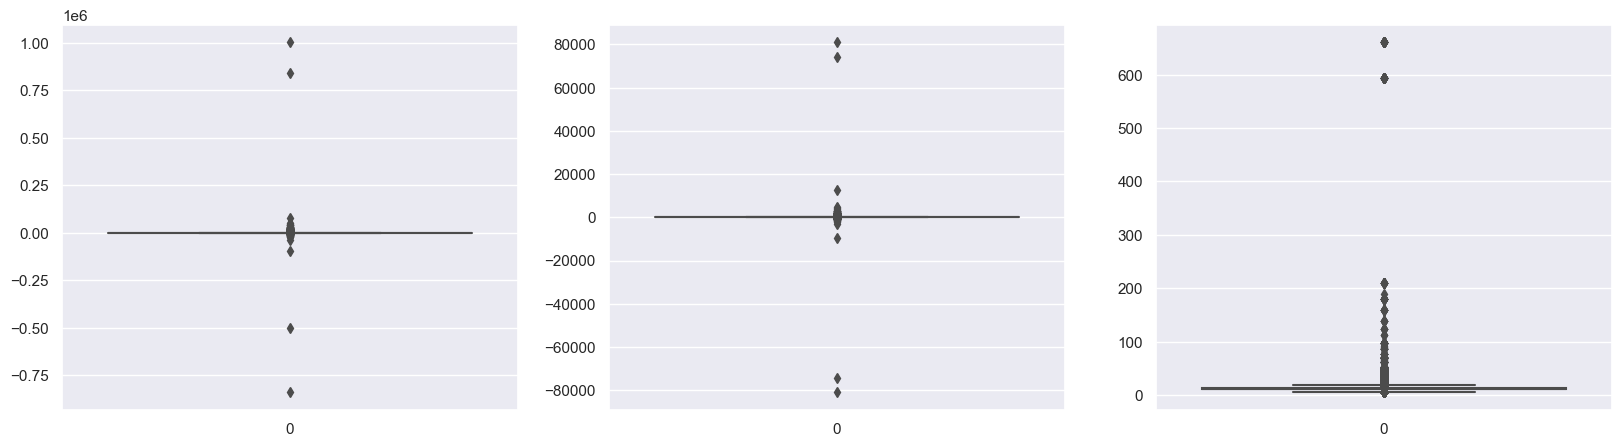

In [11]:
# Distribution of purchase values, quantity and price
fig, ax = plt.subplots(1, 3, figsize = (20, 5))
sns.boxplot(data['PurchaseValue'], ax = ax[0])
sns.boxplot(data['Quantity'], ax = ax[1])
sns.boxplot(data['Price'], ax = ax[2])
plt.show()

In [16]:
# We have negative quantities in the data, which does not make much sense.
# Let's take a better look at them
data[data['Quantity'] < 0]

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,PurchaseValue
1616,C581484,2019-12-09,23843,Paper Craft Little Birdie,6.19,-80995,16446.0,United Kingdom,-501359.05
1617,C581490,2019-12-09,22178,Victorian Glass Hanging T-Light,6.19,-12,14397.0,United Kingdom,-74.28
1618,C581490,2019-12-09,23144,Zinc T-Light Holder Stars Small,6.04,-11,14397.0,United Kingdom,-66.44
1619,C581568,2019-12-09,21258,Victorian Sewing Box Large,6.19,-5,15311.0,United Kingdom,-30.95
1620,C581569,2019-12-09,84978,Hanging Heart Jar T-Light Holder,6.19,-1,17315.0,United Kingdom,-6.19
...,...,...,...,...,...,...,...,...,...
536345,C536548,2018-12-01,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany,-37.92
536346,C536548,2018-12-01,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany,-42.27
536347,C536548,2018-12-01,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany,-11.74
536348,C536548,2018-12-01,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany,-65.40


In [35]:
# We see there are 8585 rows with this problem, so less than 2% of the data.
# I believe the best option we have here is to disconsider these rows
# If I had access to the data source, I could try to understand if these negative quantities might be customers returning items

data = data[data['Quantity'] > 0]

<Axes: xlabel='Date'>

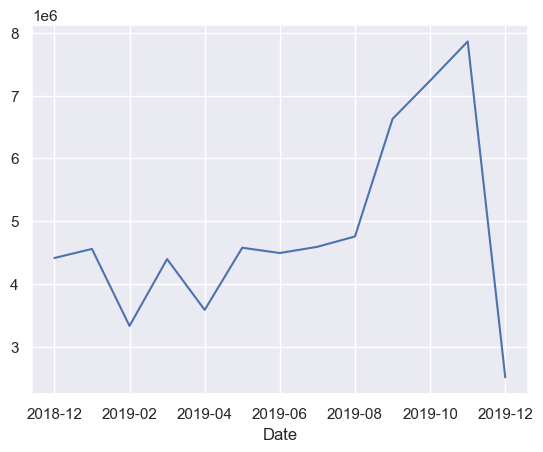

In [36]:
# Plot of sum of purchase values by date in month/year
data.groupby(data['Date'].dt.strftime('%Y-%m'))['PurchaseValue'].sum().plot()

In [40]:
# We see that sales were more or less stable until August 2019, when they spiked, increasing > 50% in just three months
# There is a huge decrease of sales in December 2023, but that is because we only have 9 days of data for that month
# If we normalized that (multiplying by 3), we would get roughly 7.5M in sales for that month, which is in line with the previous months

In [41]:
# Create quartiles and percentile rank
data["Quantiles"] = pd.qcut(data['PurchaseValue'], 5)
data["PercentileRank"] = data['PurchaseValue'].rank(pct = True)

data.head(3)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,PurchaseValue,Quantiles,PercentileRank
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64,"(138.36, 1002718.1]",0.909041
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,383.40,"(138.36, 1002718.1]",0.955401
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,138.36,"(61.9, 138.36]",0.808014


In [50]:
# Let's see the intervals for each quartile
data['Quantiles'].unique().sort_values()

[(5.129, 14.48], (14.48, 29.22], (29.22, 61.9], (61.9, 138.36], (138.36, 1002718.1]]
Categories (5, interval[float64, right]): [(5.129, 14.48] < (14.48, 29.22] < (29.22, 61.9] < (61.9, 138.36] < (138.36, 1002718.1]]

In [ ]:
# We see that at least 80% of purchases are below $138.36
# and then we have a few huge purchases with value equal to more than 1M in a single purchase

In [ ]:
# Moving to the RFV analysis

In [51]:
data_recency = (
    data[['CustomerNo', 'Date']]
    .groupby('CustomerNo')['Date']
    .agg('max')
    .reset_index()
)

data_recency.head()

,CustomerNo,Date
0,12004.0,2019-04-26
1,12006.0,2019-05-05
2,12008.0,2019-03-08
3,12013.0,2018-12-15
4,12024.0,2019-06-16


In [52]:
# Calculate the number of days since the last purchase, taking as reference the last date of the dataset
data_recency['Recency'] = (data['Date'].max() - data_recency['Date']).dt.days

data_recency.head()

,CustomerNo,Date,Recency
0,12004.0,2019-04-26,227
1,12006.0,2019-05-05,218
2,12008.0,2019-03-08,276
3,12013.0,2018-12-15,359
4,12024.0,2019-06-16,176


In [53]:
# Let's see the distribution of recency
data_recency['Recency'].describe()

count    4718.000000
mean       95.992794
std       101.758271
min         0.000000
25%        18.000000
50%        53.000000
75%       155.750000
max       373.000000
Name: Recency, dtype: float64

In [ ]:
# We can see that the average recency is ~3 months

<Axes: xlabel='Recency'>

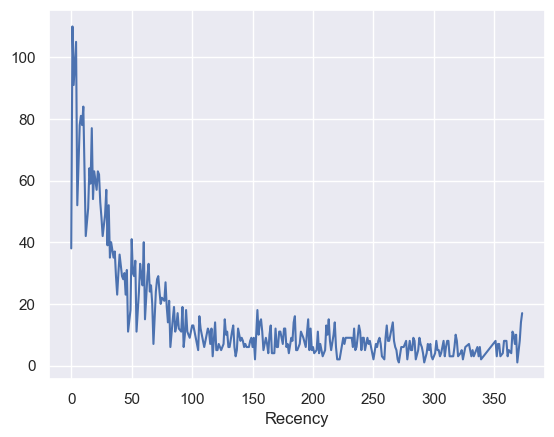

In [54]:
data_recency['Recency'].value_counts().sort_index().plot()

In [56]:
# Drop the date column
data_recency.drop('Date', axis = 1, inplace = True)

In [55]:
# Now let's calculate the frequency of purchase for each consumer

In [57]:
data_frequency = data[['CustomerNo']]

data_frequency = data_frequency.groupby('CustomerNo').value_counts().reset_index()

# rename columns
data_frequency.rename(
    columns = {'count' : 'Frequency'}, inplace = True
)

In [58]:
# Let's take a look at this data

data_frequency['Frequency'].describe()

count    4718.000000
mean      111.861806
std       234.884482
min         1.000000
25%        19.000000
50%        50.500000
75%       130.000000
max      7835.000000
Name: Frequency, dtype: float64

In [92]:
# Now let's calculate the total purchase value by each consumer
# I could also use the average purchase value, but I believe this choice depends on a better knowledge of the business
# Since I do not have it here, I will go with the total purchase value for learning purposes
# This represents the total amount each consumer has spent in the period considered here
data_value = data[['CustomerNo', 'PurchaseValue']]

data_value = data_value.groupby('CustomerNo')['PurchaseValue'].agg('sum').reset_index()

data_value = data_value.rename(
    columns = {'PurchaseValue' : 'Value'}
)

In [109]:
# Let's also take a look at this data

print('Total sales in the period: ', data_value['Value'].sum())
data_value['Value'].describe()

Total sales in the period:  62965892.339999996


count    4.718000e+03
mean     1.334589e+04
std      5.439743e+04
min      5.970000e+00
25%      1.838447e+03
50%      4.828470e+03
75%      1.190628e+04
max      2.112282e+06
Name: Value, dtype: float64

In [94]:
# Combine all three data sets that we have create

data_rfv = data_recency.merge(data_frequency, on = 'CustomerNo', how = 'left')
data_rfv = data_rfv.merge(data_value, on = 'CustomerNo', how = 'left')

data_rfv.head()

,CustomerNo,Recency,Frequency,Value
0,12004.0,227,56,1509.60
1,12006.0,218,1,24.76
2,12008.0,276,203,5689.57
3,12013.0,359,1,69.96
4,12024.0,176,5,149.52


In [ ]:
# Now that I have my data set on recency, frequency and value, 
# I want to use a clusterazition algorithm to understand the patterns in the data

# I will use the k-means algorithm for that

In [95]:
# First, we standardize the data

from sklearn.preprocessing import StandardScaler

feature_cols = ['Recency', 'Frequency', 'Value']

standardized_data = data_rfv.copy()

scaler = StandardScaler()
scaler.fit(data_rfv[feature_cols])
standardized_data[feature_cols] = scaler.transform(data_rfv[feature_cols])

In [96]:
standardized_data.head()

,CustomerNo,Recency,Frequency,Value
0,12004.0,1.287572,-0.237852,-0.217612
1,12006.0,1.199118,-0.472034,-0.244911
2,12008.0,1.769156,0.388054,-0.140763
3,12013.0,2.584901,-0.472034,-0.244080
4,12024.0,0.786331,-0.455003,-0.242617


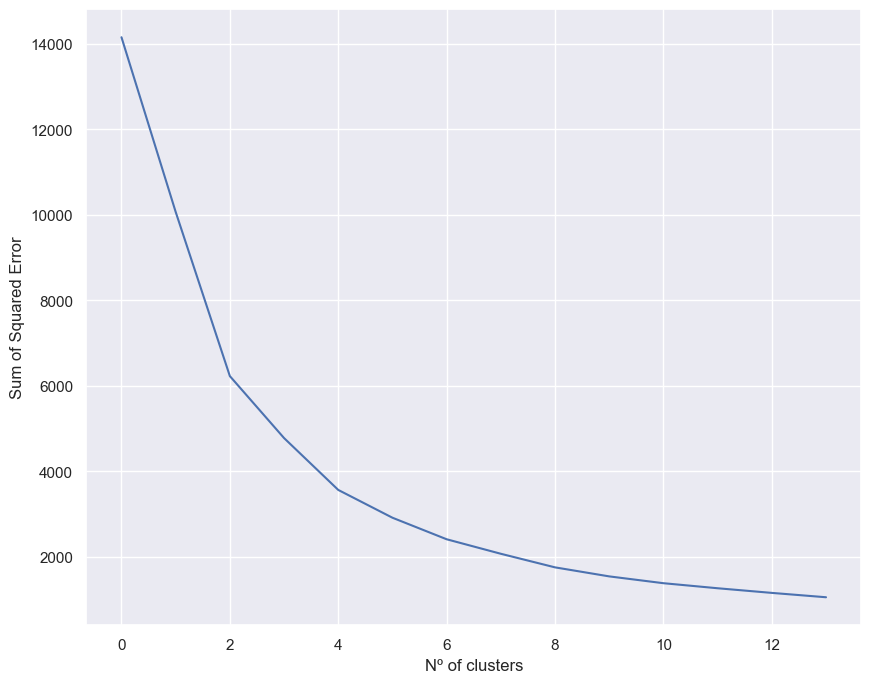

In [98]:
# Now we use the K-means algorithm

from sklearn.cluster import KMeans

sse = []

for k in range(1, 15):
    kmeans = KMeans(n_clusters = k, random_state=42, n_init=50)
    kmeans.fit(standardized_data[feature_cols])
    sse.append(kmeans.inertia_)

# Elbow method plot
plt.figure(figsize = (10, 8))
plt.plot(sse)
plt.xlabel('Nº of clusters')
plt.ylabel('Sum of Squared Error')
plt.show();

In [108]:
# Using the elbow method, is not clear (for me) if the optimal number of clusters should be 2, 3 or 4.
# I will then use all three options and see what gives me the most useful insights

for k in range(2, 5) :

    # run k-means clustering
    kmeans = KMeans(n_clusters = k, 
                    random_state = 42, 
                    n_init = 50)
    kmeans.fit(standardized_data[feature_cols])
    
    # add cluster labels to the data
    data_rfv['Cluster'] = kmeans.labels_

    # # plot features for each cluster
    # for feature in feature_cols:

    #     sns.boxplot(x = 'Cluster', y = feature, data = data_rfv)
    #     plt.show()

    # Check the metrics by cluster
    centroid_data = (
        data_rfv.groupby('Cluster')[['CustomerNo', 'Recency', 'Frequency', 'Value']]
        .agg(
            {
                'CustomerNo' : 'nunique',
                'Recency' : 'mean',
                'Frequency' : 'mean',
                'Value' : 'mean'
            }
        )
        .reset_index()
    )

    # Rename columns
    centroid_data.rename(columns = {'CustomerNo' : 'Customers'}, inplace = True)

    # See the data
    print(centroid_data)

   Cluster  Customers    Recency    Frequency          Value
0        0       4701  96.256541   104.630930   10808.490123
1        1         17  23.058824  2111.411765  715010.604118
   Cluster  Customers     Recency    Frequency          Value
0        0         17   23.058824  2111.411765  715010.604118
1        1       1274  244.368132    46.337520    3795.261177
2        2       3427   41.195506   126.301722   13415.684076
   Cluster  Customers     Recency    Frequency          Value
0        0       3426   41.196439   126.268243   13292.474370
1        1       1274  244.368132    46.337520    3795.261177
2        2         14   30.285714   931.642857  783682.079286
3        3          4    1.500000  5773.000000  404790.825000


In [111]:
for val in [12155170, 4834830, 45973205]:
    print(val / 62963205)

0.1930519578855619
0.07678818128778546
0.7301598608266526


In [ ]:
# Insights:

# - 2 clusters: we have a group of customers who has a relatively high recency (~3 months), moderate frequency (~100) and moderate value (~$10,000).
# And another group with low recency, very high frequency and high value, but with very few customers (only 17 out of 4718).
# It feels like the first group could be broken down into more groups for more informative clusters.

# - 3 clusters: first cluster we have is the same as the last one in the 2 clusters case. These are recurrent customers (low recency and very high frequency),
# but they also spend a lot of money on the store. They represent ~20% of the total sales, so we want to keep them engaged in the store. Since there are so few of them,
# it is easy to personalize the marketing approach to each one of them.
# Then we have a cluster of customers with high recency, low frequency and low value. These are customers who have not bought anything in a long time,
# so they will likey churn. But, when they do buy, they do not spend much. They represent ~7% in total sales.
# Lastly, there is a cluster that buys frequently (low recency and moderate frequency) and spend a moderate amount of money.
# This group represents ~73%.These customers are the ones we want to keep engaged in the store, since they represent the majority of the sales.

# - 4 clusters: the difference here from the 3 clusters case is that the smaller group is broken down into two even smallers subgroups.
# It seems to me that this does not bring a more accurate picture of the business. Even though we see that there are 4 huge outliers in our data (the last cluster),
# I would not change the suggested approach for this group from what I have said previously. 

# Sad that, I would go with 3 clusters, since this seems to better represent the business (at least it seems to be more useful from a business perspective).

In [113]:
kmeans = KMeans(n_clusters = 3, 
                random_state = 42, 
                n_init = 50)
kmeans.fit(standardized_data[feature_cols])

# add cluster labels to the data
data_rfv['Cluster'] = kmeans.labels_

# Check the metrics by cluster
centroid_data = (
    data_rfv.groupby('Cluster')[['CustomerNo', 'Recency', 'Frequency', 'Value']]
    .agg(
        {
            'CustomerNo' : 'nunique',
            'Recency' : 'mean',
            'Frequency' : 'mean',
            'Value' : 'mean'
        }
    )
    .reset_index()
)

# Rename columns
centroid_data.rename(columns = {'CustomerNo' : 'Customers'}, inplace = True)

# See the data
print(centroid_data)

   Cluster  Customers     Recency    Frequency          Value
0        0         17   23.058824  2111.411765  715010.604118
1        1       1274  244.368132    46.337520    3795.261177
2        2       3427   41.195506   126.301722   13415.684076


In [114]:
# Create informative labels for each cluster

labels = [
    'Premium customers',
    'Possible churn',
    'Core customers'
]

centroid_data['Label'] = labels

centroid_data

,Cluster,Customers,Recency,Frequency,Value,Label
0,0,17,23.058824,2111.411765,715010.604118,Premium customers
1,1,1274,244.368132,46.337520,3795.261177,Possible churn
2,2,3427,41.195506,126.301722,13415.684076,Core customers
